# Importing and Preprocessing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

# import warnings
# warnings.filterwarnings("ignore")

C:\Users\Jeremyas Cornelis\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df=pd.read_csv('survey-lung-cancer.csv')

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
df['GENDER']=df['GENDER'].replace(['M', 'F'],[0,1])
df['LUNG_CANCER']=df['LUNG_CANCER'].replace(['YES', 'NO'],[1,0])

# Data outline

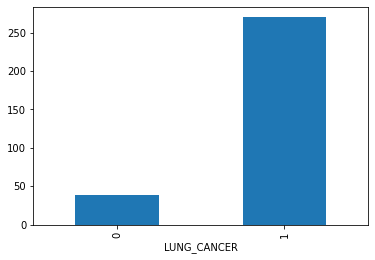

In [6]:
df.groupby('LUNG_CANCER')['LUNG_CANCER'].count().plot.bar();

In data, lung cancer positive case are more than 5 times than negative case.

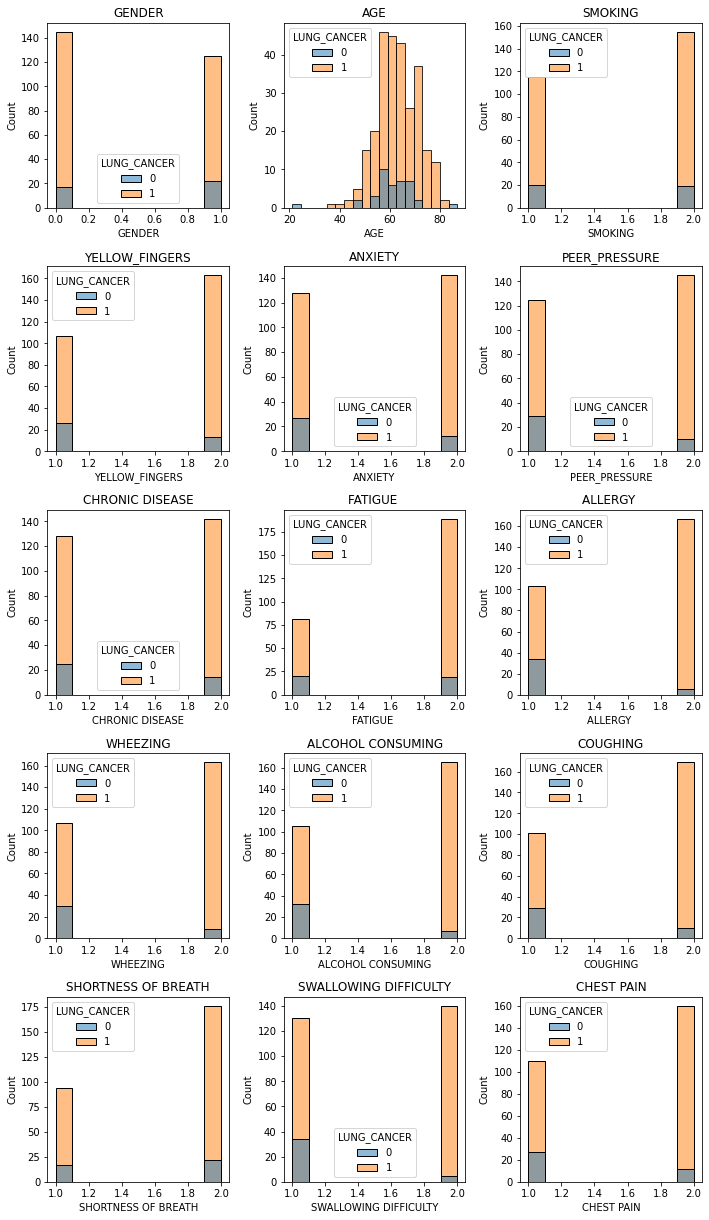

In [8]:
num_list=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='LUNG_CANCER')

plt.tight_layout()

We can find that in many cases, there are opposite trend between lung cance positive and negative except 'AGE','SMOKING' and 'SHORTNESS OF BREATH'.

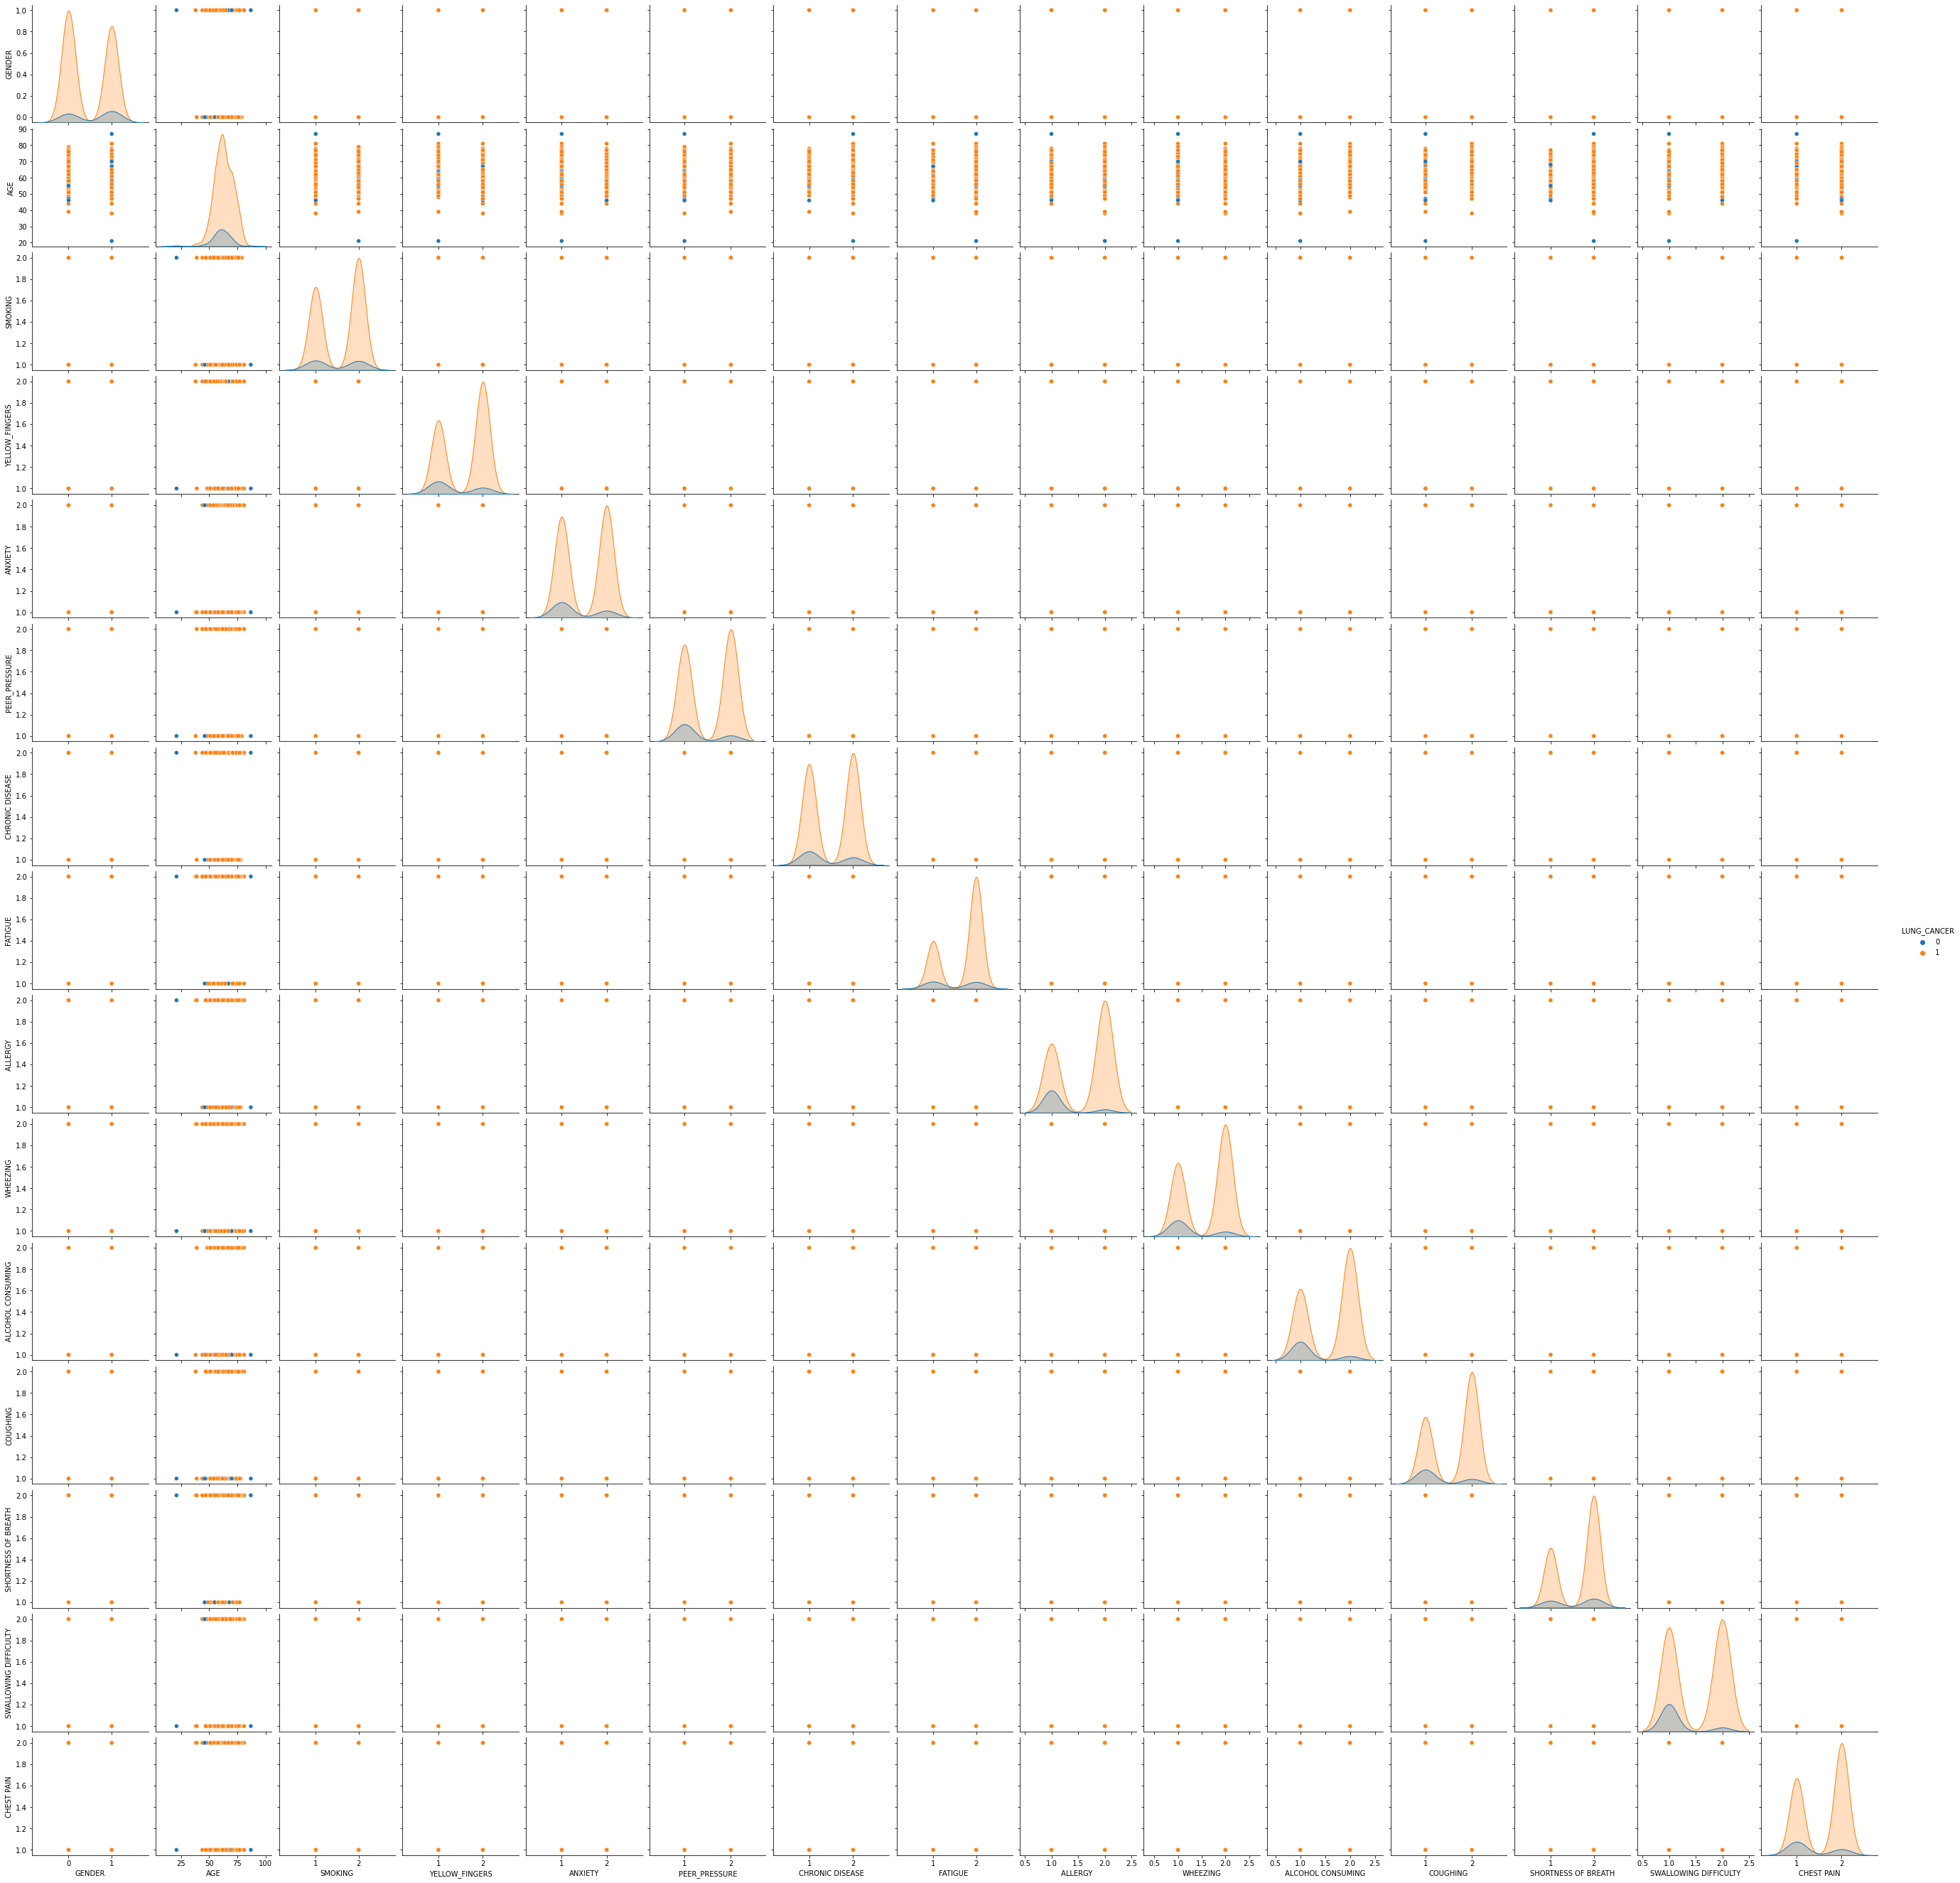

In [9]:
sns.pairplot(df,hue='LUNG_CANCER');

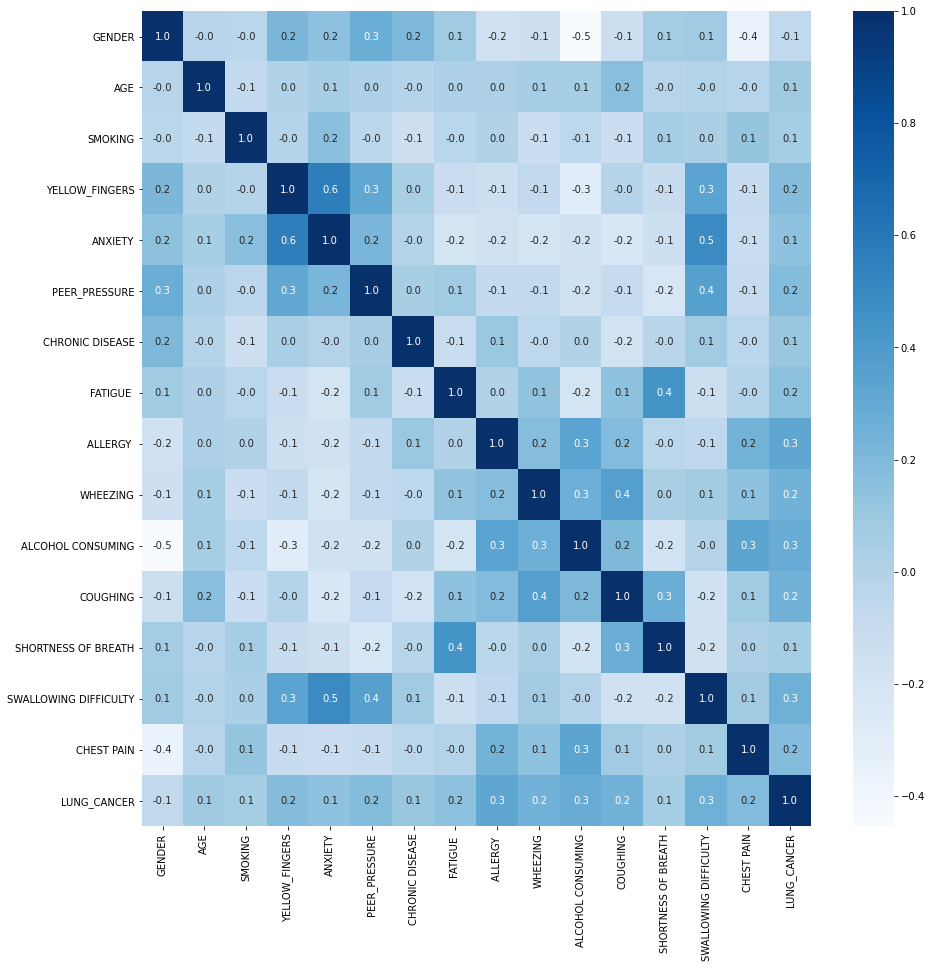

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f');

In [11]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

Correlation among features are
* 'ANXIETY' and 'SWALLOWING DIFFICULTY' : 0.5
* 'PEER_PRESSURE' and 'SWALLOWING DIFFICULTY' : 0.4
* 'FATIGUE ' and 'SHORTNESS OF BREATH' : 0.4
* 'GENDER' and 'CHEST PAIN' : -0.4
* 'GENDER' and 'ALCOHOL CONSUMING' : -0.5

Correlation with 'LUNG CANCER' are
* 'ALLERGY ', 'ALCOHOL CONSUMING' and 'SWALLOWING DIFFICULTY' : 0.3
* 'YELLOW_FINGERS', 'PEER_PRESSURE', 'FATIGUE ', 'WHEEZING', 'COUGHING' and 'CHEST PAIN' : 0.2

In [12]:
sc = StandardScaler()

# Clustering to find what kinds of positive type we have

I mada data frame which includes only positive case.

In [13]:
df_cancer=df[df['LUNG_CANCER']==1]
df_cancer=df.drop('LUNG_CANCER',axis=1)

In [14]:
df_cancer_sc=sc.fit_transform(df_cancer)

Elbow analysis to find the number of cluster

In [15]:
distortions = []

for i  in range(1,15):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_cancer_sc)
    distortions.append(km.inertia_)

plt.plot(range(1,15),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

The number of clusters will be 5 or 6. So I tried clustering by 5 clusters.

In [ ]:
kmeans_model = KMeans(n_clusters=5, random_state=10).fit(df_cancer_sc)

In [ ]:
labels = kmeans_model.labels_
df_cancer['cluster']=labels
df_cancer.groupby('cluster').mean().T

In [ ]:
num_list=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df_cancer,y=df_cancer[num_list[i]],hue='cluster')

plt.tight_layout()

We can find features of each clusters
* Cluster 0 : Occupied by 50% male and 50% female with no smokers. Most people are suffering from 'FATIGUE' and 'WHEEZING'.
* Cluster 1 : Relatively more occupied by famale, and average age is the youngest in clusters. More than half of people are 'SMOKING' and feeling 'SHORTNESS OF BREATH'. But on the other hand, most people have 'no' features such as 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'.
* Cluster 2 : Relatively more occupied by male, more than half people aare smoking, and most people have features such as 'YELLOW_FINGERS', 'ANXIETY', 'ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY' and 'CHEST PAIN'.
* Cluster 3 : Most occupied by male and smoking. Most people have features such as 'FATIGUE ', 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'CHEST PAIN'.
* Cluster 4 : Most occupied by female and smoking. Most people have features such as 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'FATIGUE' and 'SWALLOWING DIFFICULTY'.

Thank you !